In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6.4*4,4.8*1.5)

import numpy as np
from scipy import special

201
201
phase[dc]=0.0
phase[fs/2]=1.4379429061207012


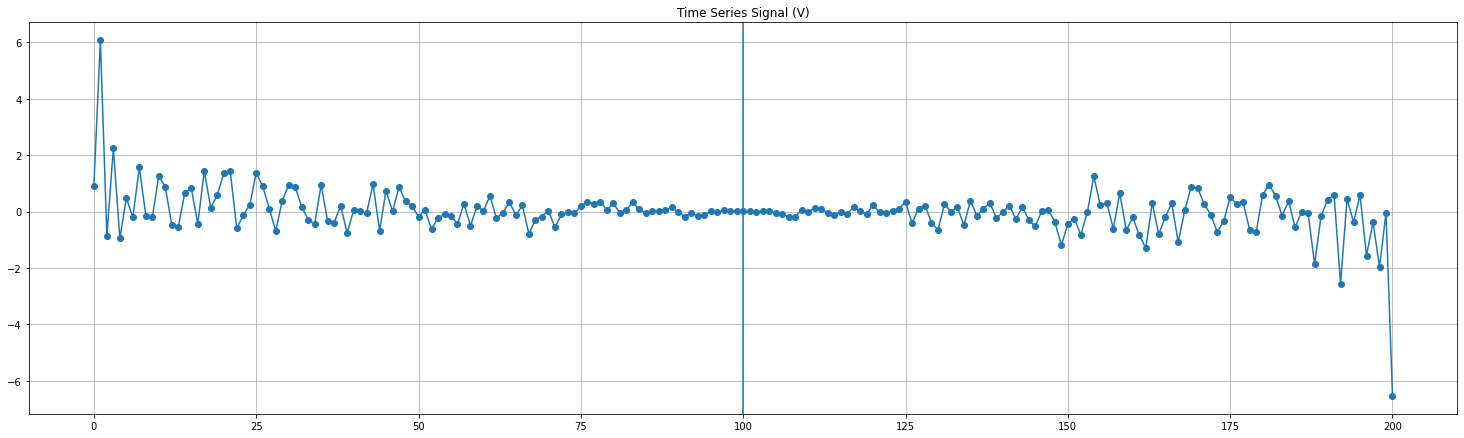

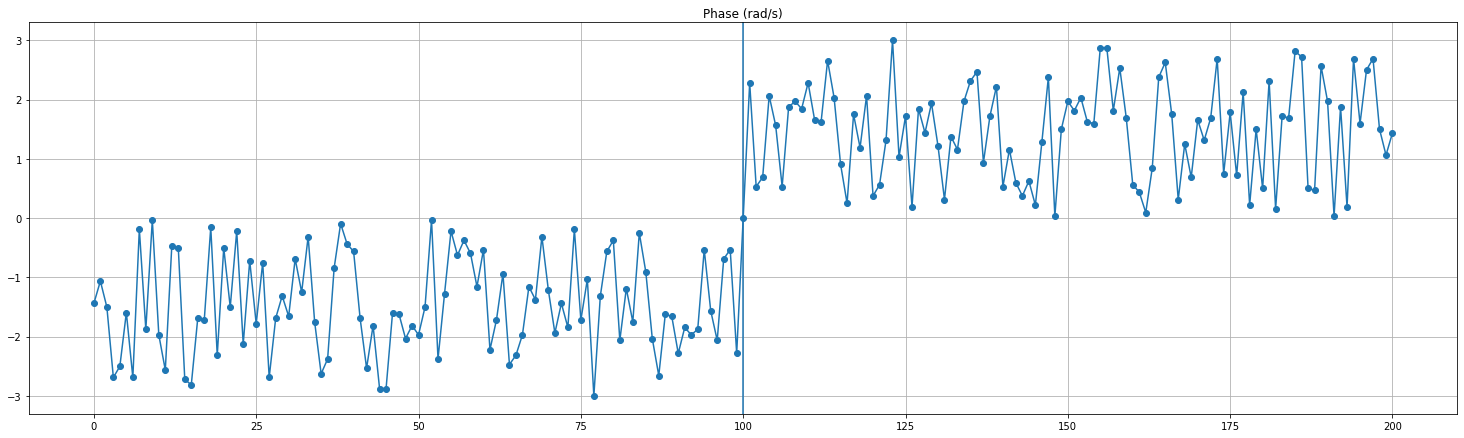

In [70]:
process = np.random.default_rng()

F = 201
F2 = (F) // 2
# sample positive frequencies up to fs, skipping dc
k = process.integers(low=1, high=F2-1, size=F2)

# signal is real, so its spectrum is hermitian
# negative frequencies are conjugate symmetric
# magnitude is even while the phase is odd
pspectrum = np.exp(1j * 2 * np.pi * k / F)
nspectrum = np.conj(np.flip(pspectrum))
# create oscillator bank with dc value U[0] = 0
U = np.concatenate(([0], pspectrum), dtype=np.complex128)

# extract the continuous time domain signal corresponding to the constructed fourier series (hermitian spectrum)
# norm of "ortho" applies a 1/sqrt(N) scaling, as desired

u = np.fft.ifft(U, norm="ortho")
ureal = np.real(u)
print(len(U))
print(len(u))

plt.figure()
plt.grid()
plt.title('Time Series Signal (V)')
plt.plot(ureal, marker='o')
plt.axvline(x=len(ureal) // 2)

plt.figure()
plt.grid()
plt.title('Phase (rad/s)')
checkfft = np.fft.fft(u, norm="ortho")
phase = np.angle(U)
print(f'phase[dc]={phase[len(phase)//2]}')
print(f'phase[fs/2]={phase[-1]}')
plt.plot(phase, marker='o')
plt.axvline(x=len(phase) // 2)
